In [1]:
import random

In [2]:
# Genetic Algorithm for Knapsack Problem (with selection, crossover, and mutation)
def initialize_problem(num_items, max_itemweight):
    # Initialize the problem
    items = []
    for _ in range(num_items):
        weight = random.randint(1, max_itemweight)
        value = random.randint(1, 100)
        items.append((weight, value))
        print("Item: weight =", weight, ", value =", value)
    return items

In [3]:
max_weight = 100
max_itemweight = 50
pop_size = 10

In [4]:
items = initialize_problem(pop_size, max_itemweight)

Item: weight = 20 , value = 70
Item: weight = 15 , value = 82
Item: weight = 21 , value = 33
Item: weight = 15 , value = 48
Item: weight = 47 , value = 14
Item: weight = 35 , value = 81
Item: weight = 18 , value = 16
Item: weight = 45 , value = 21
Item: weight = 24 , value = 57
Item: weight = 47 , value = 82


In [13]:
y1 = []
def initialize_population(pop_size, num_items):
    population = []
    for _ in range(pop_size):
        chromosome = [random.randint(0, 1) for _ in range(num_items)]
        population.append(chromosome)
    return population

def fitness(chromosome):
    total_weight = sum(items[i][0] for i in range(len(chromosome)) if chromosome[i])
    if total_weight > max_weight:
        return 0
    total_value = sum(items[i][1] for i in range(len(chromosome)) if chromosome[i])
    return total_value

def select_parents(population, num_parents):
    # Tournament selection
    parents = []
    for _ in range(num_parents):
        tournament_size = 5
        tournament = random.sample(population, tournament_size)
        winner = max(tournament, key=fitness)
        parents.append(winner)
    return parents

def crossover(parent1, parent2):
    # One-point crossover
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

def mutate(chromosome, mutation_rate):
    mutated_chromosome = []
    for gene in chromosome:
        if random.random() < mutation_rate:
            mutated_gene = 1 - gene  # Bit flip mutation
        else:
            mutated_gene = gene
        mutated_chromosome.append(mutated_gene)
    return mutated_chromosome

def genetic_algorithm_knapsack(num_generations, pop_size, mutation_rate, num_parents):
    population = initialize_population(pop_size, len(items))
    for generation in range(num_generations):
        parents = select_parents(population, num_parents)
        new_population = []
        for _ in range(pop_size // 2):
            parent1, parent2 = random.choice(parents), random.choice(parents)
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            new_population.extend([child1, child2])
        population = new_population
        print(fitness(max(new_population, key=fitness)))
        y1.append(fitness(max(new_population, key=fitness)))
    best_solution = max(population, key=fitness)
    best_value = fitness(best_solution)
    return best_solution, best_value

In [14]:
import time
start = time.time()
best_solution, best_value = genetic_algorithm_knapsack(100, 100, 0.01, 10)
end = time.time()
print("Best solution:", best_solution,best_value)
print("Time is:", end - start, "seconds")

273
281
273
281
273
290
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
273
Best solution: [1, 1, 0, 1, 0, 0, 1, 0, 1, 0] 273
Time is: 0.0373079776763916 seconds


In [7]:
import random
y2 = []
# # Define the Knapsack problem parameters
# max_weight = 50  # Maximum weight the knapsack can hold
# items = [
#     {"name": "item1", "weight": 10, "value": 60},
#     {"name": "item2", "weight": 20, "value": 100},
#     {"name": "item3", "weight": 30, "value": 120},
#     {"name": "item4", "weight": 5, "value": 30},
#     {"name": "item5", "weight": 15, "value": 70}
# ]

# Define the Random Hill Climbing algorithm
def random_solution(items):
    return [random.randint(0, 1) for _ in items]

def fitness(solution, items, max_weight):
    total_value = 0
    total_weight = 0
    for i in range(len(items)):
        if solution[i] == 1:
            total_value += items[i][1]
            total_weight += items[i][0]
    if total_weight > max_weight:
        return 0  # Penalize solutions that exceed the weight constraint
    else:
        return total_value

def hill_climbing(items, max_weight, iterations):
    current_solution = random_solution(items)
    current_fitness = fitness(current_solution, items, max_weight)

    for _ in range(iterations):
        neighbor_solution = random_solution(items)
        neighbor_fitness = fitness(neighbor_solution, items, max_weight)

        if neighbor_fitness > current_fitness:
            current_solution = neighbor_solution
            current_fitness = neighbor_fitness
        print(current_fitness)
        y2.append(current_fitness)
    return current_solution, current_fitness

# Run the Random Hill Climbing algorithm
iterations = 20
import time
start = time.time()
best_solution, best_fitness = hill_climbing(items, max_weight, iterations)
end = time.time()
# Print the results
print("Best solution:", best_solution)
print("Best fitness (total value):", best_fitness)
print("time is:", end - start, "seconds")

0
0
187
187
187
187
212
212
212
212
212
212
212
212
212
212
212
212
212
212
Best solution: [0, 1, 0, 1, 0, 0, 0, 0, 0, 1]
Best fitness (total value): 212
time is: 0.0002872943878173828 seconds


In [8]:
import random
import math
y3 = []
# Define the Knapsack problem
class KnapsackProblem:
    def __init__(self, items, capacity):
        self.items = items
        self.capacity = capacity

    def evaluate(self, solution):
        total_weight = sum(self.items[i][0] * x for i, x in enumerate(solution))
        total_value = sum(self.items[i][1] * x for i, x in enumerate(solution))
        if total_weight > self.capacity:
            return -1  # Penalize infeasible solutions
        else:
            return total_value

def generate_random_solution(problem):
    return [random.randint(0, 1) for _ in problem.items]

def neighbor(solution):
    index = random.randint(0, len(solution) - 1)
    new_solution = solution[:]
    new_solution[index] = 1 - new_solution[index]
    return new_solution

def simulated_annealing(problem, initial_solution, initial_temperature, cooling_rate, num_iterations):
    current_solution = initial_solution
    best_solution = initial_solution
    temperature = initial_temperature

    for i in range(num_iterations):
        new_solution = neighbor(current_solution)
        current_value = problem.evaluate(current_solution)
        new_value = problem.evaluate(new_solution)

        if new_value > current_value or random.random() < math.exp((new_value - current_value) / temperature):
            current_solution = new_solution

        if problem.evaluate(current_solution) > problem.evaluate(best_solution):
            best_solution = current_solution
        print(problem.evaluate(best_solution))
        y3.append(problem.evaluate(best_solution))
        temperature *= cooling_rate

    return best_solution

# Initialize the problem
def initialize_problem(num_items, max_itemweight, knapsack_capacity):
    items = []
    for _ in range(num_items):
        weight = random.randint(1, max_itemweight)
        value = random.randint(1, 100)
        items.append((weight, value))
        print("Item: weight =", weight, ", value =", value)
    return items

# Example usage
num_items = 10
max_itemweight = 50
knapsack_capacity = 100

# items = initialize_problem(num_items, max_itemweight, knapsack_capacity)
problem = KnapsackProblem(items, knapsack_capacity)
initial_solution = generate_random_solution(problem)
initial_temperature = 100.0
cooling_rate = 0.95
num_iterations = 20
import time 
start = time.time()
best_solution = simulated_annealing(problem, initial_solution, initial_temperature, cooling_rate, num_iterations)
end = time.time()
print("Best solution:", best_solution)
print("Total value:", problem.evaluate(best_solution))
print("Total weight:", sum(problem.items[i][0] * x for i, x in enumerate(best_solution)))
print(end - start, "seconds")

-1
-1
-1
-1
-1
-1
-1
138
171
171
187
187
212
212
212
212
212
212
212
212
Best solution: [0, 1, 1, 0, 0, 1, 1, 0, 0, 0]
Total value: 212
Total weight: 89
0.0003895759582519531 seconds


In [9]:
import random
import math
import numpy as np
from sklearn.mixture import GaussianMixture
y4 = []
# Define the Knapsack problem
class KnapsackProblem:
    def __init__(self, items, capacity):
        self.items = items
        self.capacity = capacity

    def evaluate(self, solution):
        total_weight = sum(self.items[i][0] * x for i, x in enumerate(solution))
        total_value = sum(self.items[i][1] * x for i, x in enumerate(solution))
        if total_weight > self.capacity:
            return -1  # Penalize infeasible solutions
        else:
            return total_value

def generate_random_solution(problem):
    return [random.randint(0, 1) for _ in problem.items]

def mimic(problem, population_size, num_iterations, num_samples, num_clusters):
    population = [generate_random_solution(problem) for _ in range(population_size)]

    for iteration in range(num_iterations):
        # Evaluate the population
        fitness_values = [problem.evaluate(solution) for solution in population]

        # Select the top-performing solutions
        top_indices = np.argsort(fitness_values)[-num_samples:]

        # Build a model from the selected solutions
        selected_solutions = [population[i] for i in top_indices]
        model = GaussianMixture(n_components=num_clusters, random_state=0)
        model.fit(selected_solutions)

        # Generate new solutions from the model
        new_population = model.sample(population_size)[0]
        new_population = [[int(round(x)) for x in solution] for solution in new_population]

        population = new_population
        print(max(fitness_values))
        y4.append(max(fitness_values))
    # Find the best solution in the final population
    best_solution = max(population, key=lambda solution: problem.evaluate(solution))
    return best_solution

# Initialize the problem
def initialize_problem(num_items, max_itemweight, knapsack_capacity):
    items = []
    for _ in range(num_items):
        weight = random.randint(1, max_itemweight)
        value = random.randint(1, 100)
        items.append((weight, value))
        print("Item: weight =", weight, ", value =", value)
    return items

# Example usage
num_items = 10
max_itemweight = 50
knapsack_capacity = 100

# items = initialize_problem(num_items, max_itemweight, knapsack_capacity)
problem = KnapsackProblem(items, knapsack_capacity)
population_size = 10
num_iterations = 20
num_samples = 10
num_clusters = 5
import time
start = time.time()
best_solution = mimic(problem, population_size, num_iterations, num_samples, num_clusters)
end = time.time()
print("Best solution:", best_solution)
print("Total value:", problem.evaluate(best_solution))
print("Total weight:", sum(problem.items[i][0] * x for i, x in enumerate(best_solution)))
print(end - start, "seconds")

-1
-1
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
50
Best solution: [1, 0, -1, -1, 0, 1, -1, 1, 1, -1]
Total value: 50
Total weight: 23
0.05681037902832031 seconds


In [10]:
# import matplotlib.pyplot as plt

# # Data
# x1 = [10, 50, 100, 1000]
# y1 = [0.018, 0.04, 0.08, 0.77]
# x2 = [50,100,1000]
# y2 = [0.17,0.34,3.11]
# x3 = [50,100,200]
# y3 = [0.21,0.47,0.94]
# x4 = [10,50,100]
# y4 = [0.34,1.64,4.75]
# y1 = [i * 3 for i in y1]
# y2 = [i * 3 for i in y2]
# y3 = [i * 3 for i in y3]
# y4 = [i * 3 for i in y4]
# # Create a figure and axis
# fig, ax = plt.subplots()

# # Plot the data
# ax.plot(x1, y1, marker='o', linestyle='-',label='Genetic Algorithm')
# ax.plot(x2, y2, marker='o', linestyle='-',label='Random Hill Climbing')
# ax.plot(x3, y3, marker='o', linestyle='-',label='Simulated Annealing')
# ax.plot(x4, y4, marker='o', linestyle='-',label='MIMIC')
# # Set labels for the x and y axes
# ax.set_xlabel('item number')
# ax.set_ylabel('time/s')

# # Set the title for the plot
# ax.set_title('Genetic Algorithm for Knapsack Problem')

# # Display the plot
# plt.legend()
# plt.show()

[273, 281, 273, 281, 273, 290, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273, 273]


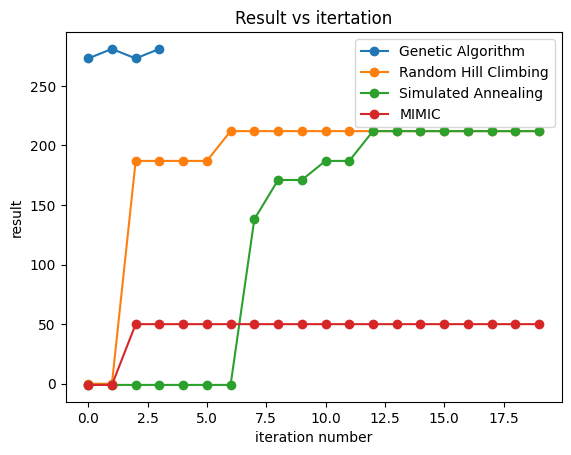

In [15]:
import matplotlib.pyplot as plt

# Data
x1 = [i for i in range(4)]
# y1 = [253,260,286,286]
x2 = [i for i in range(20)]
x3 = [i for i in range(20)]
x4 = [i for i in range(20)]
# y2 = [0.17,0.34,3.11]
# x3 = [50,100,200]
# y3 = [0.21,0.47,0.94]
# x4 = [10,50,100]
# y4 = [0.34,1.64,4.75]
# y1 = [i * 3 for i in y1]
# y2 = [i * 3 for i in y2]
# y3 = [i * 3 for i in y3]
# y4 = [i * 3 for i in y4]
# Create a figure and axis
fig, ax = plt.subplots()
print(y1)
# Plot the data
ax.plot(x1, y1[:4], marker='o', linestyle='-',label='Genetic Algorithm')
ax.plot(x2, y2, marker='o', linestyle='-',label='Random Hill Climbing')
ax.plot(x3, y3, marker='o', linestyle='-',label='Simulated Annealing')
ax.plot(x4, y4, marker='o', linestyle='-',label='MIMIC')
# Set labels for the x and y axes
ax.set_xlabel('iteration number')
ax.set_ylabel('result')

# Set the title for the plot
ax.set_title('Result vs itertation')

# Display the plot
plt.legend()
plt.show()